In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)


In [2]:
np.random.seed(42)

data = pd.DataFrame({
    "app_usage_hours": np.random.uniform(1, 10, 3000),
    "monthly_transactions": np.random.randint(5, 200, 3000),
    "avg_transaction_value": np.random.uniform(100, 5000, 3000),
    "social_connections": np.random.randint(50, 1500, 3000),
    "late_night_activity": np.random.uniform(0, 1, 3000),
    "device_price": np.random.randint(6000, 90000, 3000),
    "location_stability": np.random.randint(1, 365, 3000),
    "previous_loan": np.random.randint(0, 2, 3000)
})

# Target variable (default risk)
data["default"] = (
    (data["late_night_activity"] > 0.6).astype(int) |
    (data["monthly_transactions"] < 20).astype(int) |
    (data["location_stability"] < 30).astype(int)
)

data.head()


,app_usage_hours,monthly_transactions,avg_transaction_value,social_connections,late_night_activity,device_price,location_stability,previous_loan,default
0,4.370861,119,3653.044684,289,0.653830,75902,21,1,1
1,9.556429,61,4001.873251,315,0.681209,83994,79,0,1
2,7.587945,76,4181.393222,1178,0.752155,68878,158,1,1
3,6.387926,11,4930.264423,962,0.503577,26615,94,1,1
4,2.404168,188,3977.293033,546,0.894055,17164,8,1,1


In [3]:
X = data.drop("default", axis=1)
y = data["default"]


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)


In [5]:
model = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    random_state=42
)

model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, n_estimators=300, random_state=42)

In [6]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]


In [7]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       383
           1       1.00      1.00      1.00       367

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750



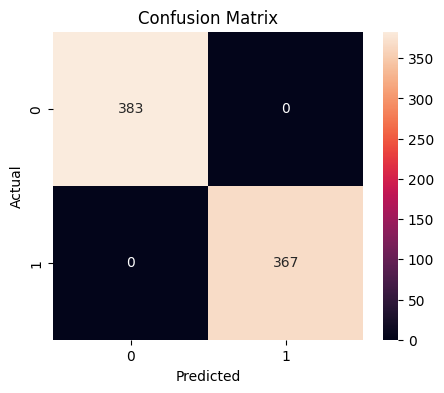

In [8]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


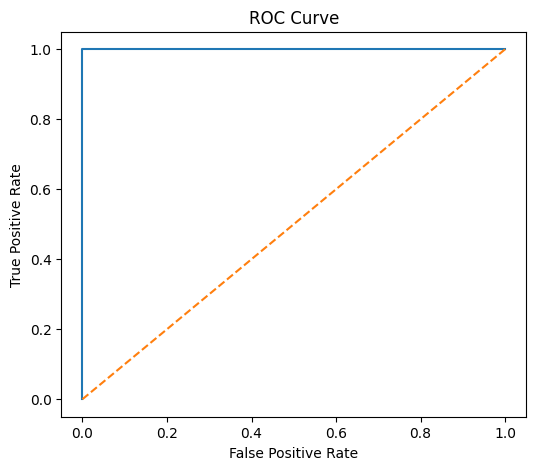

ROC AUC Score: 1.0


In [9]:
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

print("ROC AUC Score:", roc_auc_score(y_test, y_prob))


In [10]:
credit_score = (1 - y_prob) * 1000

result = X_test.copy()
result["Default_Probability"] = y_prob
result["Credit_Score"] = credit_score.astype(int)

result.head()


,app_usage_hours,monthly_transactions,avg_transaction_value,social_connections,late_night_activity,device_price,location_stability,previous_loan,Default_Probability,Credit_Score
2632,1.039269,190,3562.921028,532,0.835949,20538,37,0,0.939320,60
76,7.941433,102,3765.278776,904,0.469303,67794,300,0,0.035906,964
1726,5.584799,177,4669.934500,266,0.005652,39005,348,1,0.042880,957
1944,8.097535,170,123.933883,1457,0.979248,30967,48,0,0.942450,57
1040,5.855422,69,2058.324210,196,0.104076,15524,226,0,0.037298,962
